In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

iem_dallas_df = pd.read_csv("demos.csv")
iem_dallas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14280 entries, 0 to 14279
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   match_id                     14280 non-null  int64  
 1   map_id                       14280 non-null  int64  
 2   round_id                     14280 non-null  int64  
 3   team_name                    14280 non-null  object 
 4   map_name                     14280 non-null  object 
 5   round_number                 14280 non-null  int64  
 6   round_ct_team                14280 non-null  object 
 7   round_first_site_hit         8290 non-null   object 
 8   round_site_hit_time          8290 non-null   float64
 9   round_bomb_plant_site        7460 non-null   object 
 10  player_planted_bomb          14280 non-null  bool   
 11  round_bomb_plant_time        7460 non-null   float64
 12  round_bomb_defuser           14280 non-null  bool   
 13  bomb_defuse_time

Average Kills of Each Player Throughout the Tournament

Text(0.5, 1.0, 'Average Kills of each Player in IEM Dallas 2025')

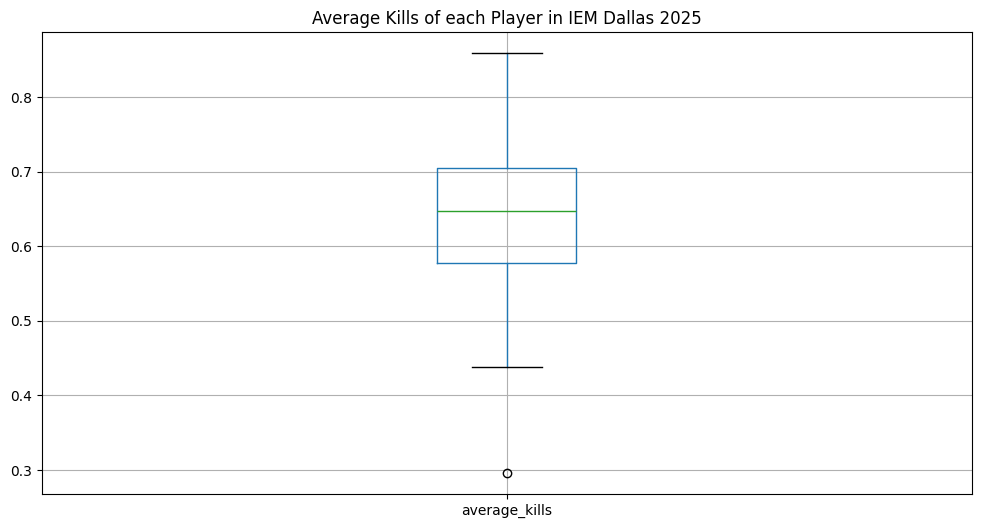

In [2]:
total_kills_per_player = iem_dallas_df.groupby("player_name")["player_kills"].sum()

total_rounds_per_player = iem_dallas_df.groupby("player_name")["round_id"].nunique().to_frame().reset_index()
total_rounds_per_player.rename(columns={"round_id": "total_rounds"}, inplace=True)


overall_average_kills_per_player_df = pd.merge(total_kills_per_player, total_rounds_per_player, on="player_name")
overall_average_kills_per_player_df['average_kills'] = overall_average_kills_per_player_df["player_kills"] / overall_average_kills_per_player_df["total_rounds"]

overall_average_kills_per_player_df = overall_average_kills_per_player_df.sort_values("average_kills", ascending=False)

overall_average_kills_per_player_df.boxplot('average_kills', figsize=(12, 6))
plt.pyplot.title("Average Kills of each Player in IEM Dallas 2025")




Average 